In [1]:
import pandas as pd

学习目标
- 掌握seaborn的可视化绘图方法

# seaborn 简介

seaborn 是基于 matplotlib 的图形可视化 python 包。它提供了一种高度交互式界面，便于用户能够做出各种有吸引力的统计图表。

1）seaborn 是在 matplotlib 的基础上进行了更高级的 API 封装，从而使得作图更加容易，在大多数情况下使用seaborn 能做出很具有吸引力的图，而使用 matplotlib 就能制作具有更多特色的图

2）seaborn和 pandas 的 API 配合的很好，使用 DataFrame/Series 的数据就可以绘图

1）加载 fifa.csv 数据

In [2]:
# index_col指定行标签索引列，parse_dates=True: 解析日期数据为datetime类型
fifa_data = pd.read_csv('./data/fifa.csv', index_col='Date', parse_dates=True)
fifa_data.head()

,ARG,BRA,ESP,FRA,GER,ITA
Date,,,,,,
1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0


2）使用 seanborn 绘制折线图

<AxesSubplot: xlabel='Date'>

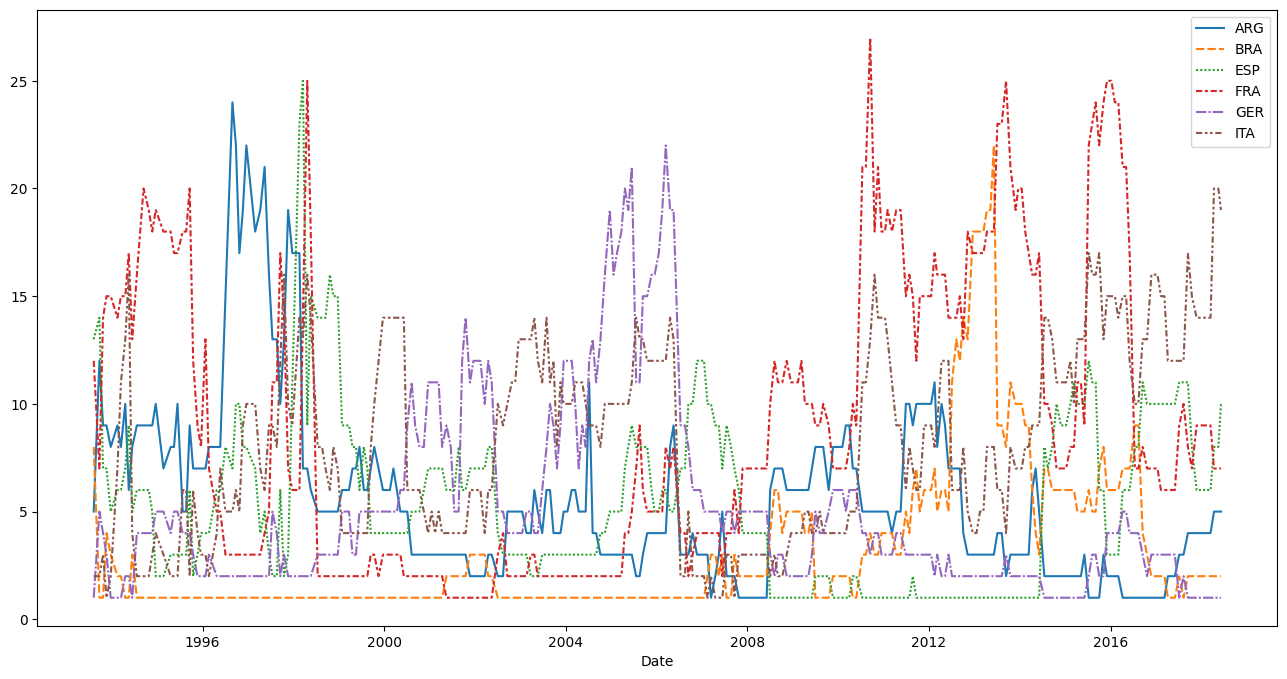

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
sns.lineplot(data=fifa_data)

# seaborn 单变量数据可视化
## 直方图
1）使用 sns.distplot 创建直方图，如下所示

C:\Users\hp\AppData\Local\Temp\ipykernel_12964\2436671155.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'])


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

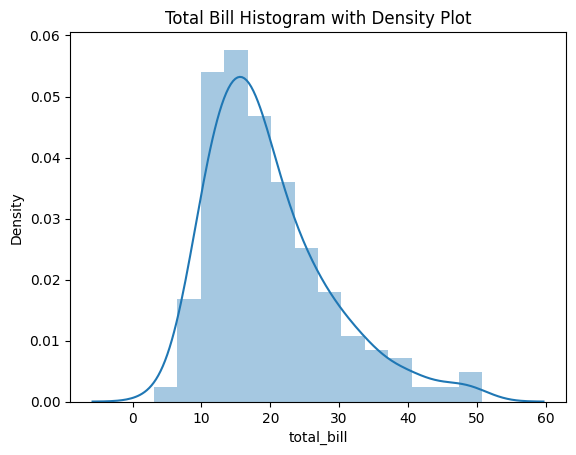

In [4]:
# 加载 seaborn 的自带数据
tips = sns.load_dataset('tips',data_home='./seaborn-data/',cache=True)
# 使用 seaborn 的 distplot 函数绘图
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

- distplot 默认会同时绘制直方图和密度图(核密度估计 kde)。
- 核密度估计：就是采用平滑的峰值函数(“核”)来拟合观察到的数据点，从而对真实的概率分布曲线进行模拟。

如果只想绘制直方图，可以把kde参数设置为False

C:\Users\hp\AppData\Local\Temp\ipykernel_12964\2437176954.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'], kde=False)


Text(0.5, 1.0, 'Total Bill Histogram')

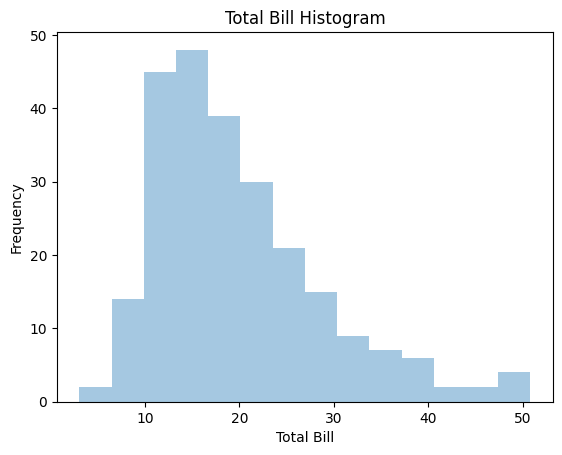

In [5]:
ax = sns.distplot(tips['total_bill'], kde=False)

ax.set_xlabel('Total Bill')

ax.set_ylabel('Frequency')

ax.set_title('Total Bill Histogram')

## 密度图（核密度估计）

- 密度图是展示单变量分布的另一种方法，本质上是通过绘制每个数据点为中心的正态分布，然后消除重叠的图，使曲线下的面积为1来创建的

C:\Users\hp\AppData\Local\Temp\ipykernel_12964\2274211034.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'],hist=False)


Text(0.5, 1.0, 'Total Bill Histogram')

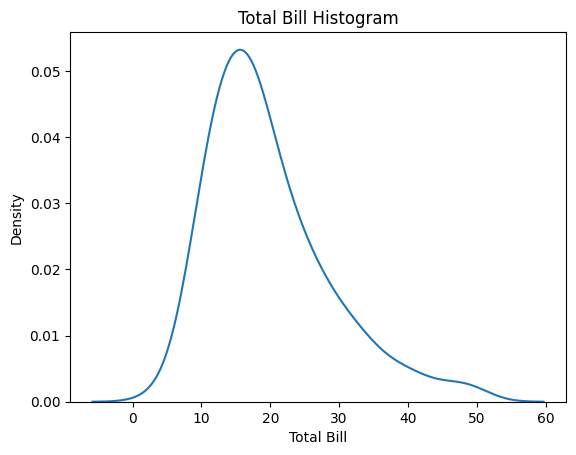

In [6]:
ax = sns.distplot(tips['total_bill'],hist=False)
ax.set_xlabel('Total Bill')
ax.set_ylabel('Density')
ax.set_title('Total Bill Histogram')

- 如果只绘制密度图，还可以使用sns.kdeplot函数

## 频数图

- 频数图是变量分布的一维表示，常与其他图一起使用，以增强可视化效果

### 下图展示的是带密度图和频数图的直方图

C:\Users\hp\AppData\Local\Temp\ipykernel_12964\289676198.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'],rug=True)


Text(0.5, 0, 'Total Bill')

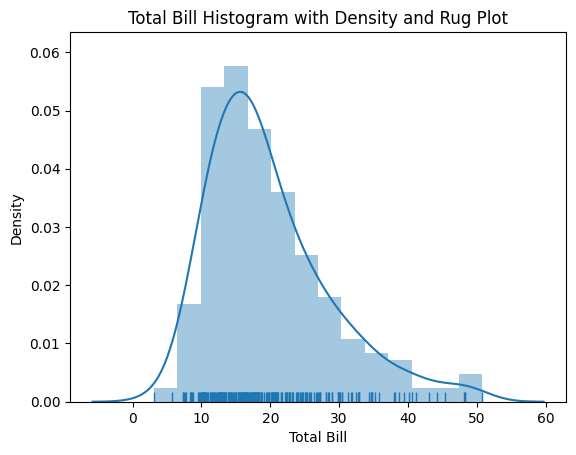

In [7]:
ax = sns.distplot(tips['total_bill'],rug=True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

## 计数图（条形图）

- 计数图和直方图很像，直方图通过对数据分组来描述分布。计数图（条形图）是对离散变量（分类变量）计数

Text(0, 0.5, 'Frequency')

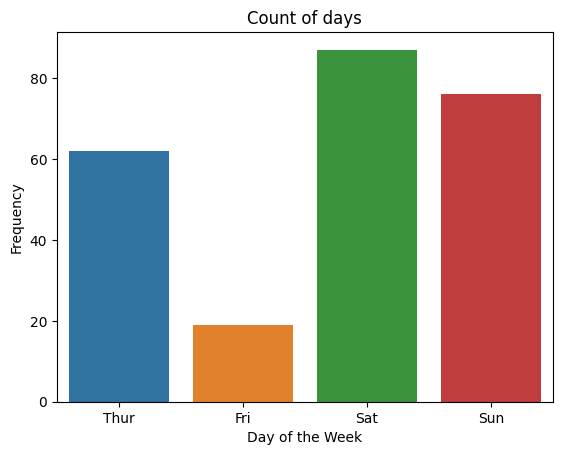

In [8]:
ax = sns.countplot(x='day',data = tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

# seaborn 双变量数据可视化

## 散点图

- 在 seaborn 中，创建散点图的方法有很多，但是并没有名为 scatter 的函数。

- 创建散点图可以使用 regplot 函数。regplot 不仅可以绘制散点图，还会拟合回归线，把 fit_reg 设置为False，将只显示散点图

Text(0, 0.5, 'Tip')

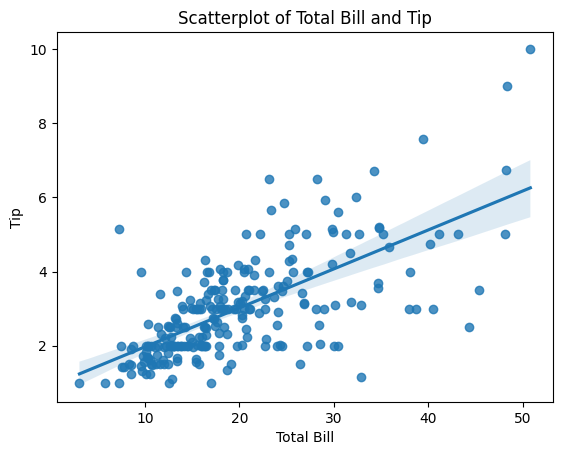

In [9]:
ax = sns.regplot(x='total_bill',y='tip',data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

- lmplot函数和regplot函数类似，也可以用于创建散点图：

- lmplot函数内部会调用regplot，两者的主要区别是regplot创建坐标轴，而lmplot创建图

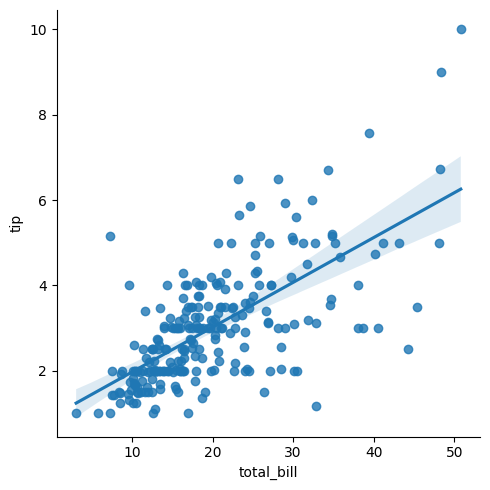

In [10]:
fig = sns.lmplot(x='total_bill',y='tip',data=tips)

- 还可以使用jointplot在每个轴上创建包含单个变量直方图的散点图

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

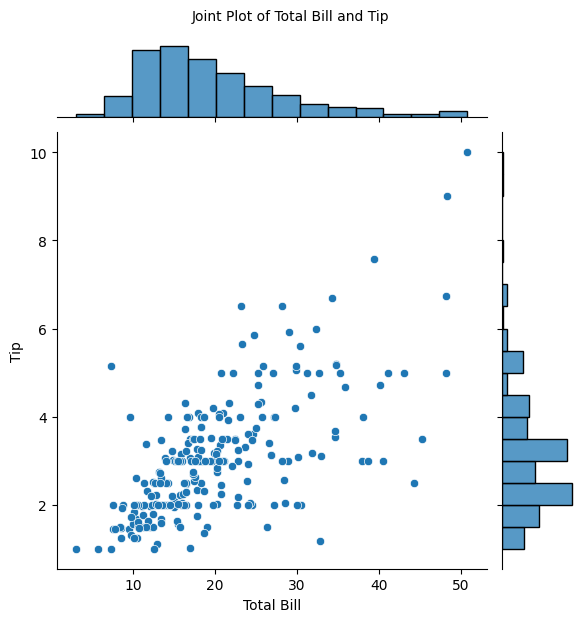

In [11]:
joint = sns.jointplot(x='total_bill',y='tip',data=tips)
joint.set_axis_labels(xlabel='Total Bill',ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip',fontsize=10,y=1.03)

## 蜂巢图

- 使用 seaborn 的jointplot绘制蜂巢图，和使用 Matplotlib 的 hexbin 函数进行绘制的效果类似

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

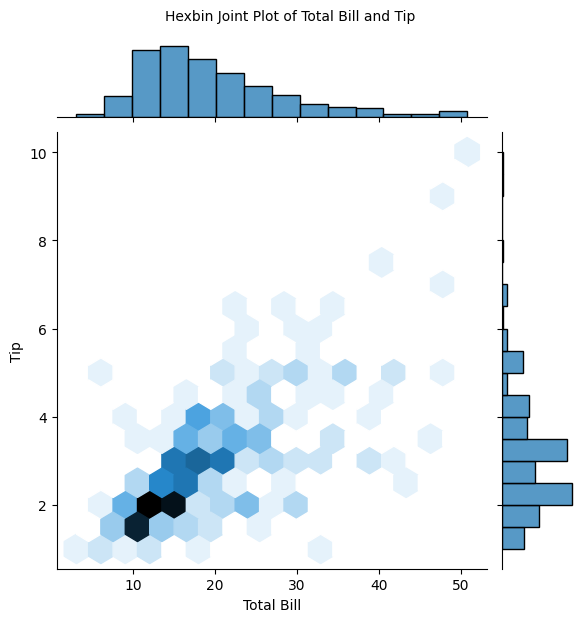

In [12]:
joint = sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')
joint.set_axis_labels(xlabel='Total Bill',ylabel='Tip')
joint.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip',fontsize=10,y=1.03)

## 2D 密度图

- 2D 核密度图和distplot类似，但2D核密度图可展示两个变量

C:\Users\hp\AppData\Local\Temp\ipykernel_12964\1276855580.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=tips['total_bill'],y=tips['tip'],shade=True)


Text(0, 0.5, 'Tip')

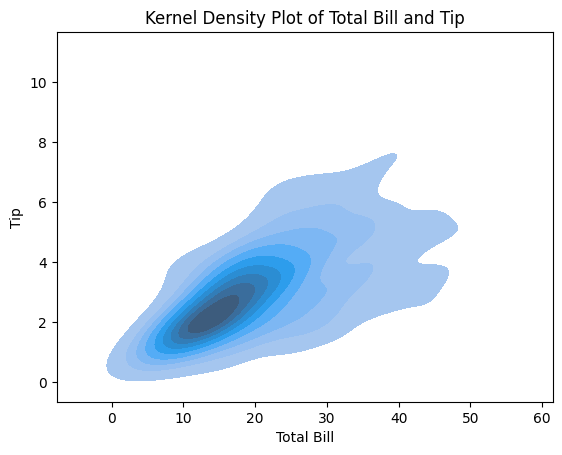

In [13]:
ax = sns.kdeplot(x=tips['total_bill'],y=tips['tip'],shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

C:\Users\hp\AppData\Local\Temp\ipykernel_12964\3313202832.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=tips['total_bill'],y=tips['tip'],shade=False)


Text(0, 0.5, 'Tip')

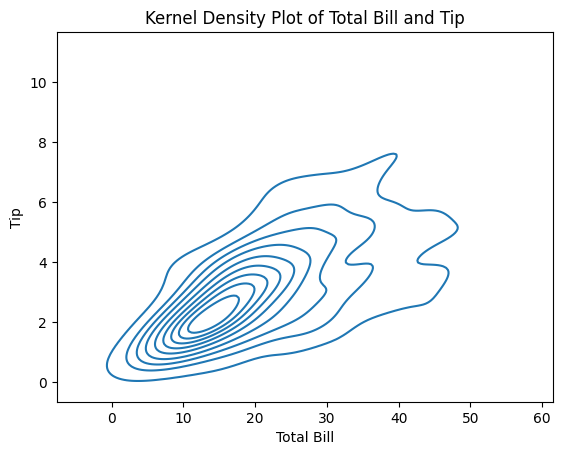

In [14]:
ax = sns.kdeplot(x=tips['total_bill'],y=tips['tip'],shade=False)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

E:\Anaconda3\envs\dasci\lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


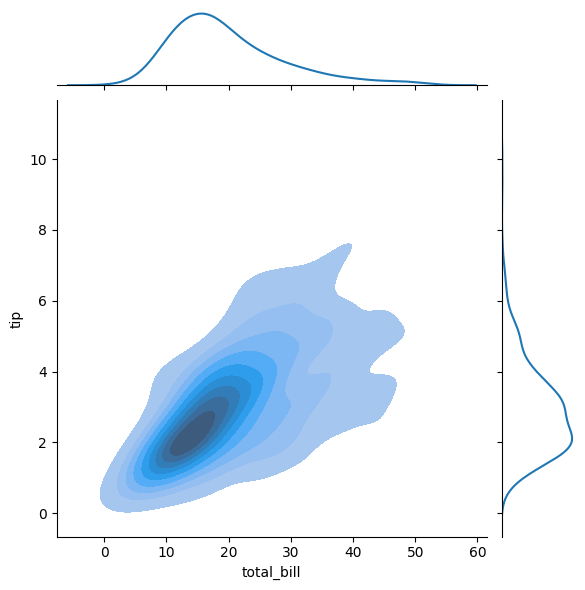

In [15]:
kde_joint = sns.jointplot(x='total_bill',y='tip',data=tips,shade=True,kind='kde')

## 条形图

- 条形图也可以用于展现多个变量，barplot 默认会计算平均值

Text(0, 0.5, 'Average total bill')

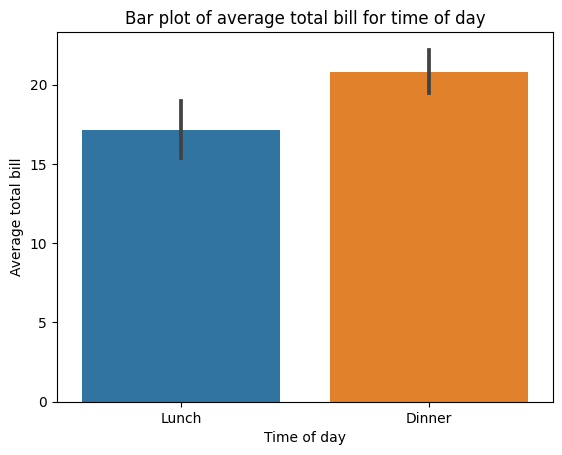

In [16]:
ax = sns.barplot(x='time',y='total_bill',data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

##  箱线图

- 箱线图用于显示多种统计信息：最小值、1/4分位、中位数、3/4分位、最大值，以及离群值（如果有）

Text(0, 0.5, 'Total Bill')

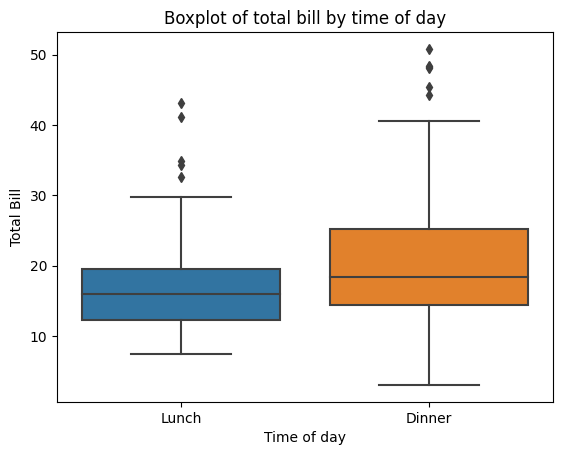

In [17]:
ax = sns.boxplot(x='time',y='total_bill',data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

## 小提琴图

Text(0, 0.5, 'Total Bill')

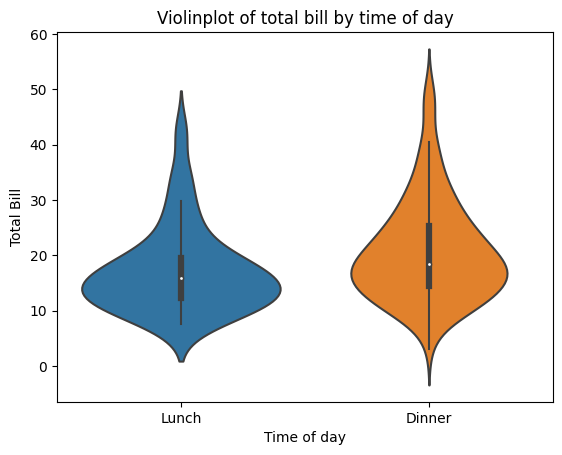

In [18]:
ax = sns.violinplot(x='time',y='total_bill',data=tips)
ax.set_title('Violinplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

## 成对关系

- pairplot 函数会为单变量绘制直方图，双变量绘制散点图：

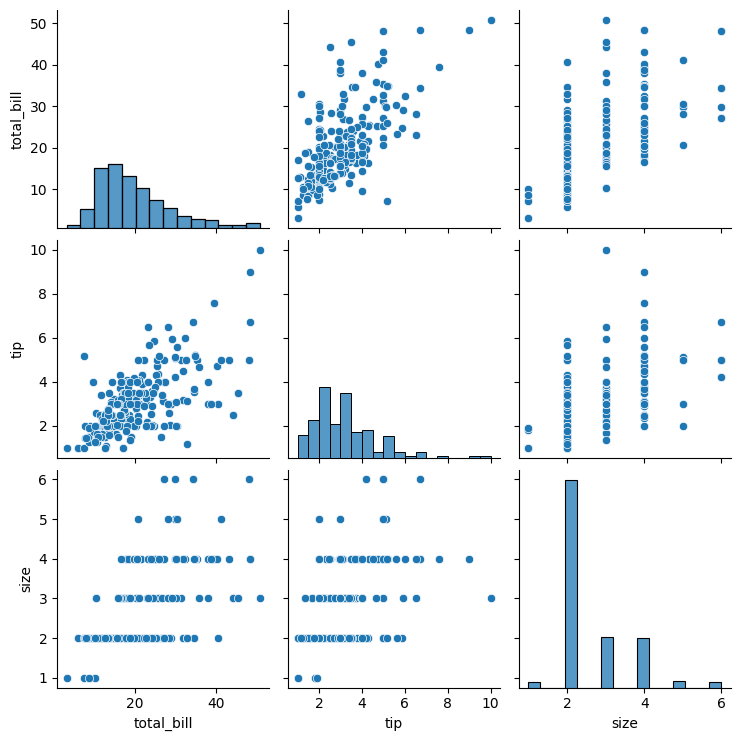

In [19]:
fig = sns.pairplot(tips)

- pairplot 的缺点是存在冗余信息，图的上半部分和下半部分相同

- 可以使用pairgrid手动指定图的上半部分和下半部分：

E:\Anaconda3\envs\dasci\lib\site-packages\seaborn\axisgrid.py:1609: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
E:\Anaconda3\envs\dasci\lib\site-packages\seaborn\axisgrid.py:1609: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
E:\Anaconda3\envs\dasci\lib\site-packages\seaborn\axisgrid.py:1609: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)


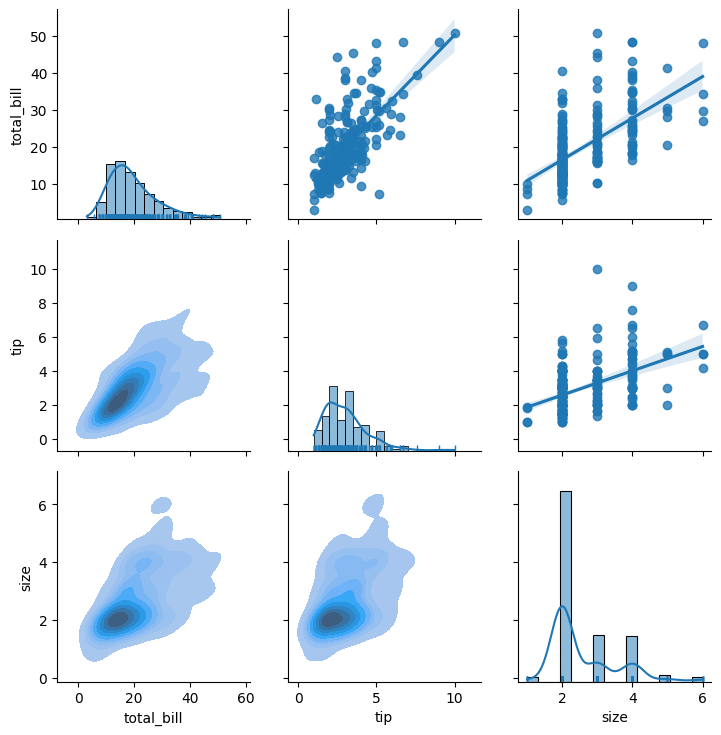

In [20]:
pair_grid = sns.PairGrid(tips)
pair_grid.map_upper(sns.regplot)
pair_grid.map_lower(sns.kdeplot,shade=True)
pair_grid.map_diag(sns.histplot,kde=True)
pair_grid.map_diag(sns.rugplot)

# seaborn 多变量数据可视化

- 绘制多变量数据没有标准的套路，如果想在图中包含更多信息，可以使用颜色、大小和形状来区分它们

## 通过颜色区分

- 使用violinplot函数时，可以通过hue参数按性别（sex）给图着色

- 可以为“小提琴”的左右两半着不同颜色，用于区分性别：

Text(0, 0.5, 'Total Bill')

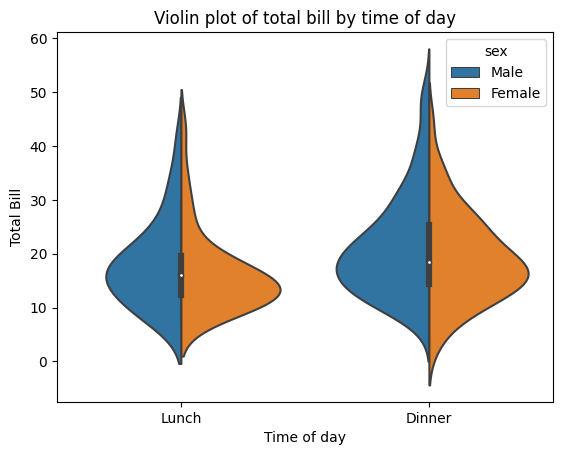

In [21]:
ax = sns.violinplot(x='time',y='total_bill',hue='sex',data=tips,split=True)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

- 其它绘图函数中也存在hue参数：

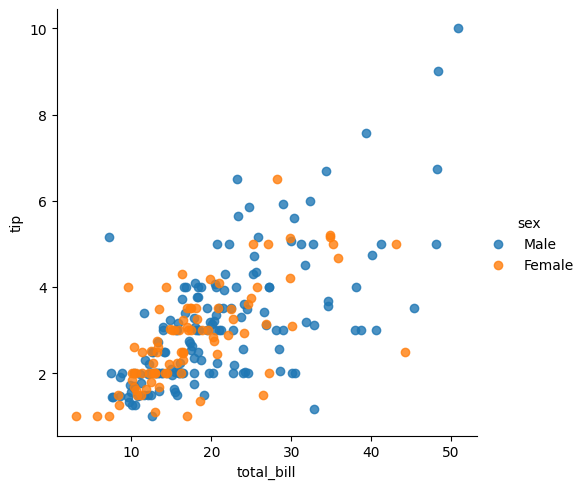

In [22]:
scatter = sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',fit_reg=False)

- 通过向hue参数传入一个类别变量，可以让pairplot变得更有意义：

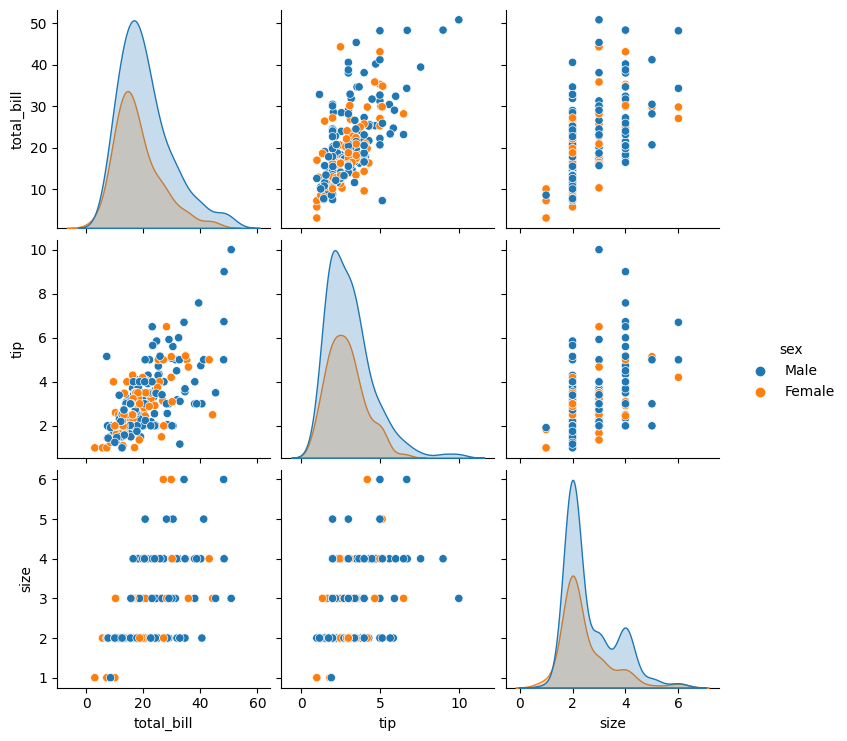

In [23]:
fig = sns.pairplot(tips,hue='sex')

## 通过大小和形状区分

- 可以通过点的大小表示更多信息，但通过大小区分应谨慎使用，当大小差别不大时很难区分

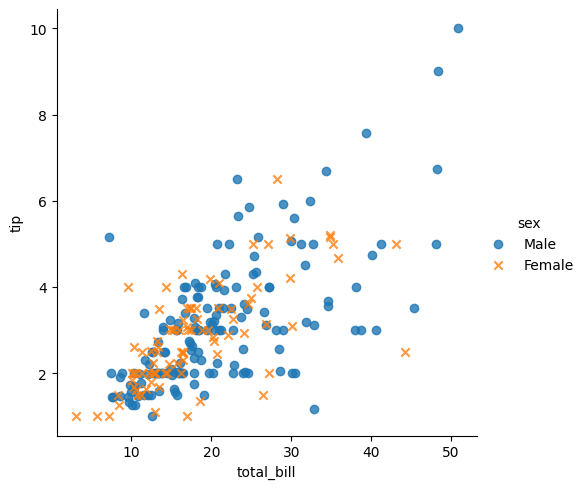

In [24]:
# 在 seaborn 中的lmplot，可以通过scatter_kws参数来控制散点图点的大小：
scatter = sns.lmplot(x='total_bill',y='tip',data=tips,
                    fit_reg=False,hue='sex',markers=['o','x'])

## 分面

- 同一张二维图形中能展示的信息有限，如果想展示更多变量，可以使用分面（facet）来满足这些需求

### 使用 seaborn 的 lmplot函数重新绘制 anscombe 数据

In [25]:
anscombe = sns.load_dataset('anscombe',data_home='./seaborn-data/',cache=True)
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


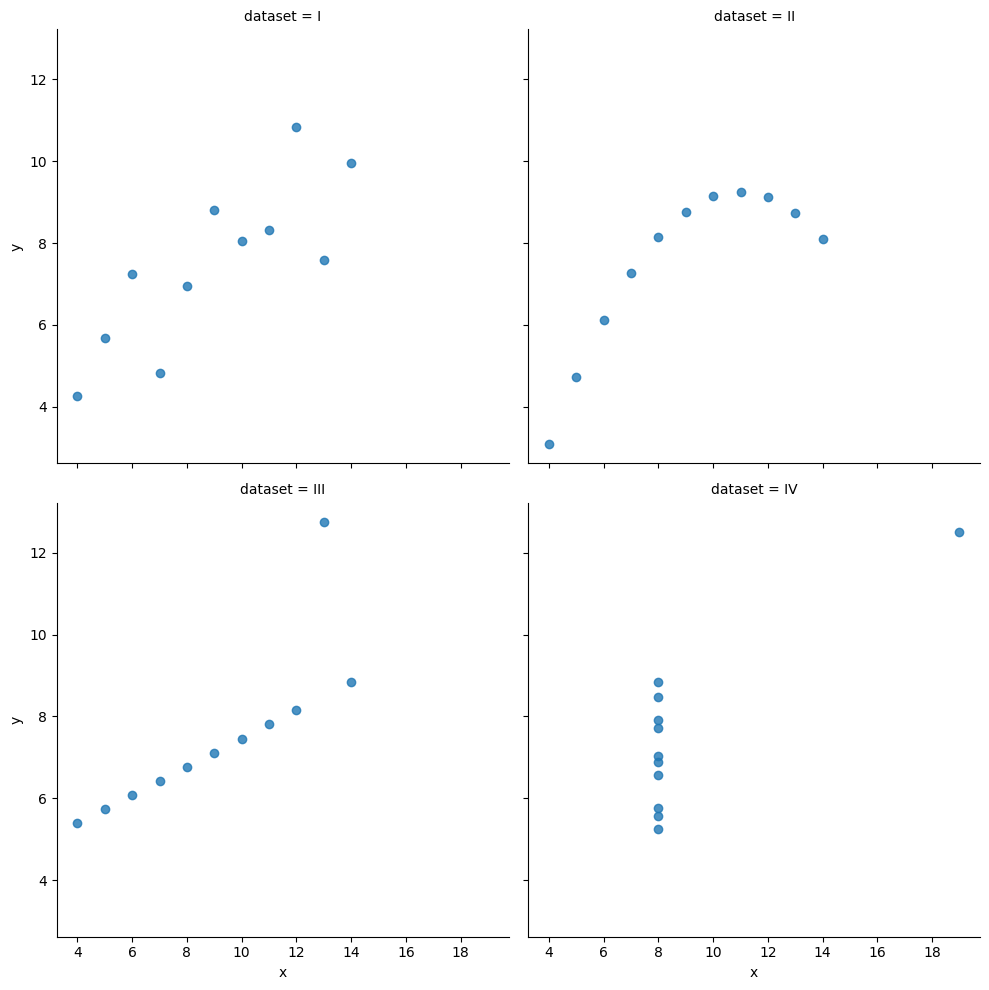

In [26]:
# col:用于指定分面变量，这里指定'dataset'列中，每个取值创建一张散点图
# col_wrap:用于指定绘制的图形有几例
anscombe_plot = sns.lmplot(x='x',y='y',data=anscombe,fit_reg=False,col='dataset',col_wrap=2)

- 注意：lmplot函数返回的是figure(图)，但regplot函数返回的是 axes(坐标系)，只有返回 figure 的函数，才有 col 和 col_wrap 参数

- 如果是返回 axes 的函数，必须先创建 FacetGrid，通过 FacetGrid 创建分面：

E:\Anaconda3\envs\dasci\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
E:\Anaconda3\envs\dasci\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


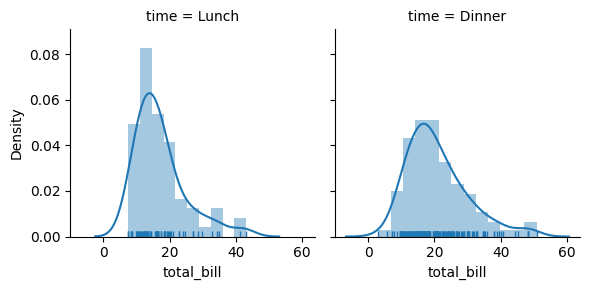

In [27]:
facet = sns.FacetGrid(tips,col='time')
facet.map(sns.distplot,'total_bill',rug=True)

- FacetGrid 中绘图可以直接调用 Matplotlib 中的绘图方法

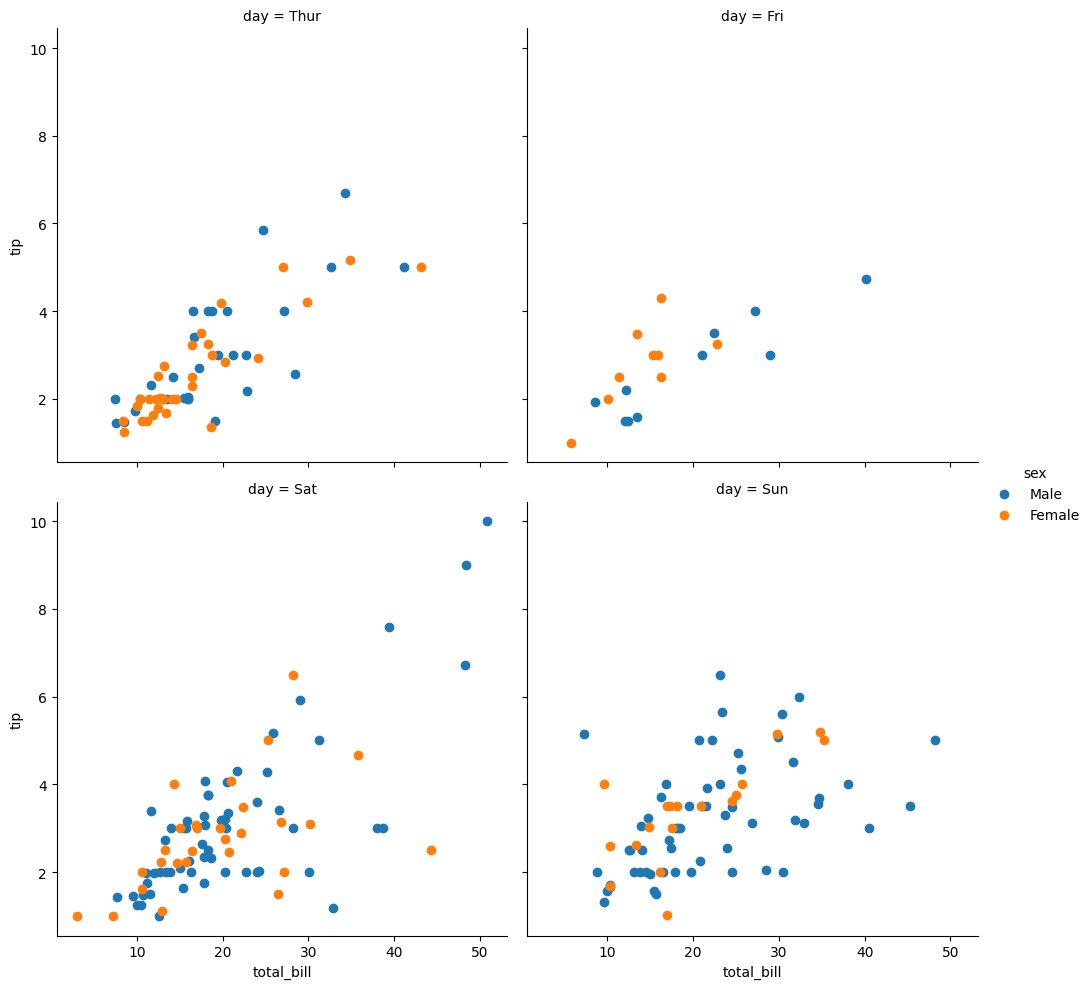

In [28]:
facet = sns.FacetGrid(data=tips,col='day',hue='sex',height=5,col_wrap=2)
facet.map(plt.scatter,'total_bill','tip')
facet.add_legend()

- 相同的效果也可以使用 seaborn 的 lmplot 实现

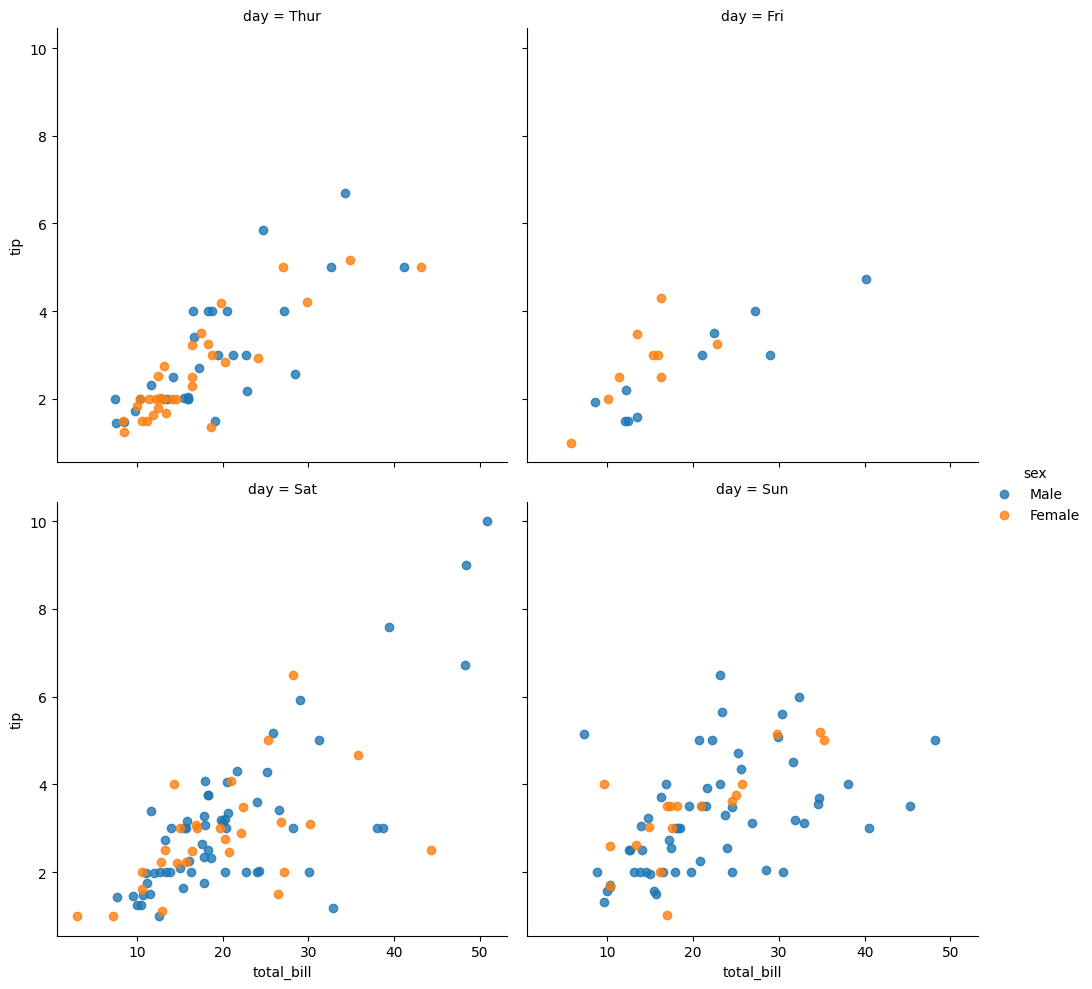

In [29]:
fig = sns.lmplot(x='total_bill',y='tip',data=tips,fit_reg=False,hue='sex',col='day',col_wrap=2)

# seaborn 主题和样式

- 上面的 seaborn 图都采用了默认样式，可以使用 sns.set_style 函数更改样式。

- 该函数只要运行一次，后续绘图的样式都会发生变化。

- seaborn 有 5 种样式：

    - darkgrid 黑色网格（默认）
    - whitegrid 白色网格
    - dark 黑色背景
    - white 白色背景
    - ticks- 

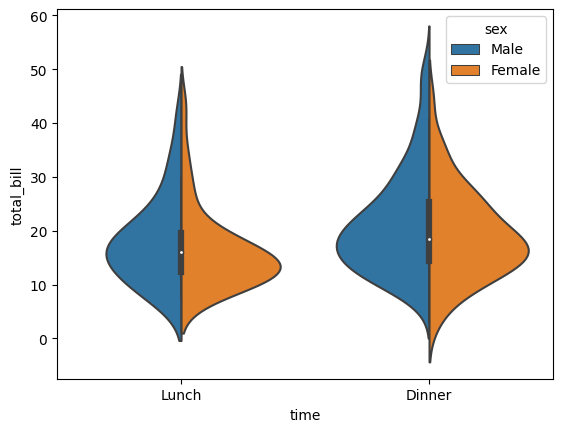

In [30]:
ax = sns.violinplot(x='time',y='total_bill',hue='sex',data=tips,split=True)

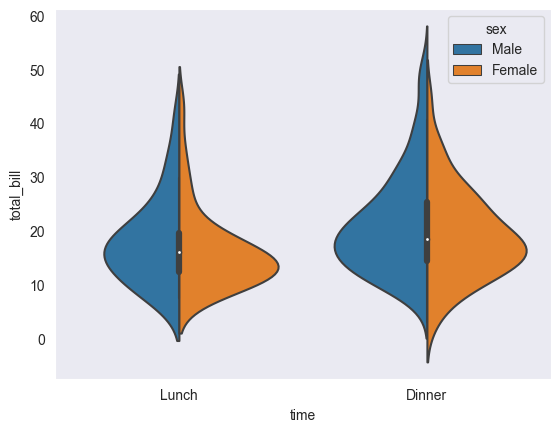

In [31]:
sns.set_style('dark')
ax = sns.violinplot(x='time',y='total_bill',hue='sex',
                   data=tips,split=True)

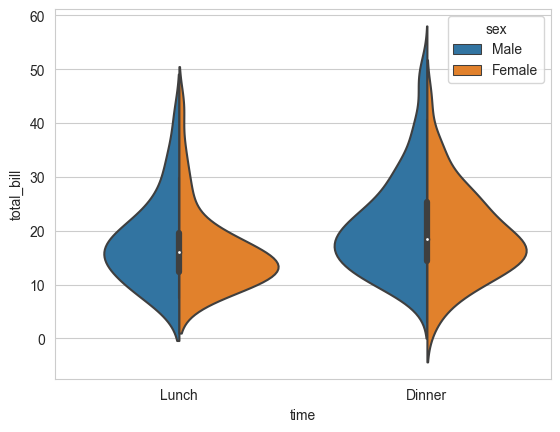

In [32]:
sns.set_style('whitegrid')
ax = sns.violinplot(x='time',y='total_bill',hue='sex',
                   data=tips,split=True)

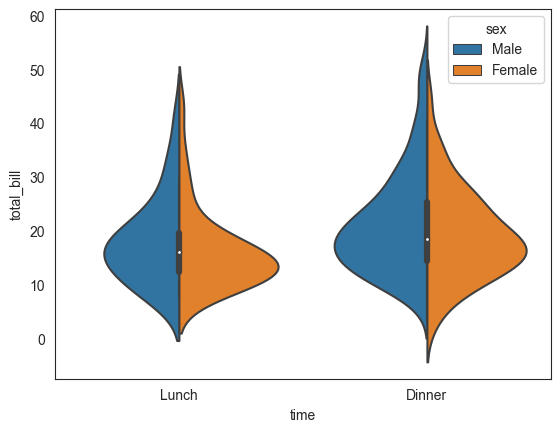

In [33]:
sns.set_style('white')
ax = sns.violinplot(x='time',y='total_bill',hue='sex',
                   data=tips,split=True)

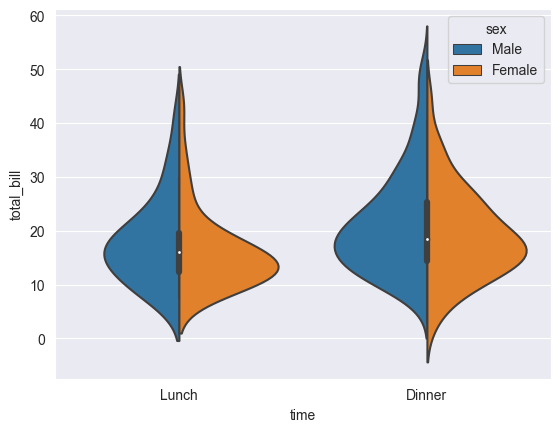

In [34]:
sns.set_style('darkgrid')
ax = sns.violinplot(x='time',y='total_bill',hue='sex',
                   data=tips,split=True)

# 总结
seaborn 是对 Matplotlib 以及 pandas 的封装，与Series、DataFrame的 API 配合很好
seaborn的 API 非常简单
推荐使用 seaborn 或 pandas 进行绘图，如果需要对图形控制比较精细，可以使用Matplotlib